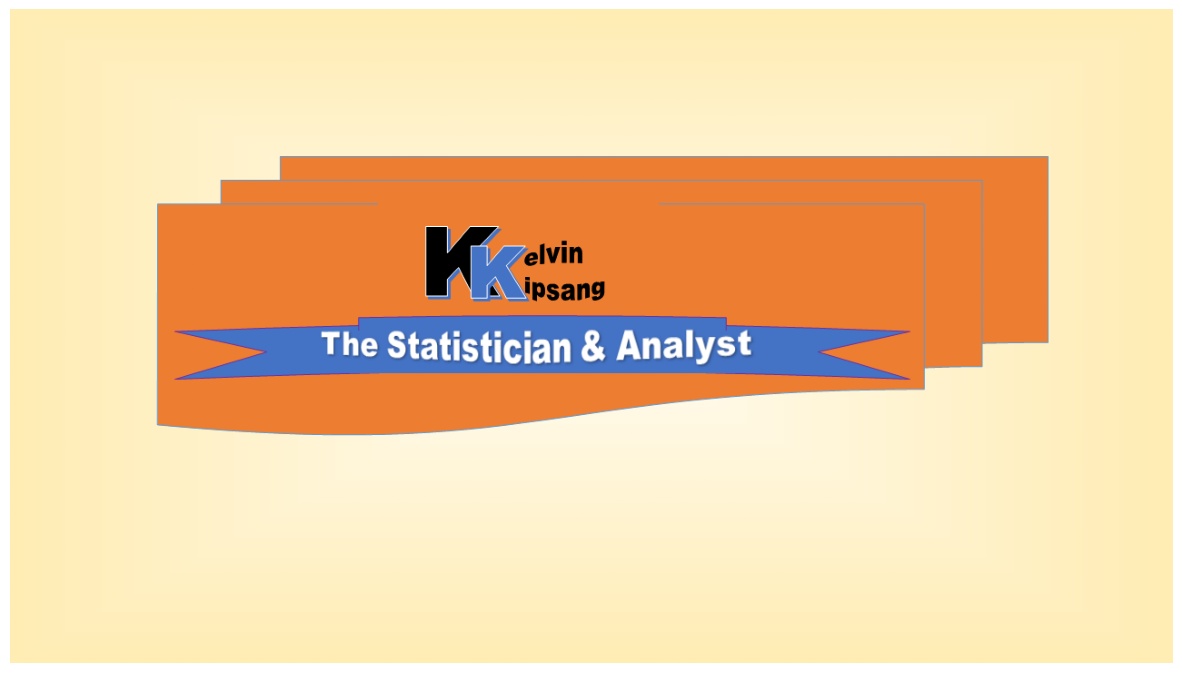

In [48]:
import matplotlib.image as mp
img = mp.imread(r"C:\\Users\\kelvin\\Downloads\\kelvin_logo_7.png")
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(img);

# Project 1 : Machine Learning with Python

# Simple Linear Regression

In [1]:
#Basic packages
import pandas as pd
import numpy as np

#visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1.Sklearn Package

In [2]:
#Data Wrangling

def wrangle(path):
    df=pd.read_csv(path)
    df.drop(columns=['radio','newspaper','Unnamed: 0'],inplace=True)
    return df

In [3]:
#Data filepath
df = wrangle(r"C:\Users\kelvin\Downloads\Advertising.csv")
print(df.shape)
df.head()

(200, 2)


,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
#Splicing train and Test Dataset
input_x = ['TV']
x=df[input_x]

target = 'sales'
y=df[target]
print("X shape:",x.shape)
print("y shape",y.shape)

X shape: (200, 1)
y shape (200,)


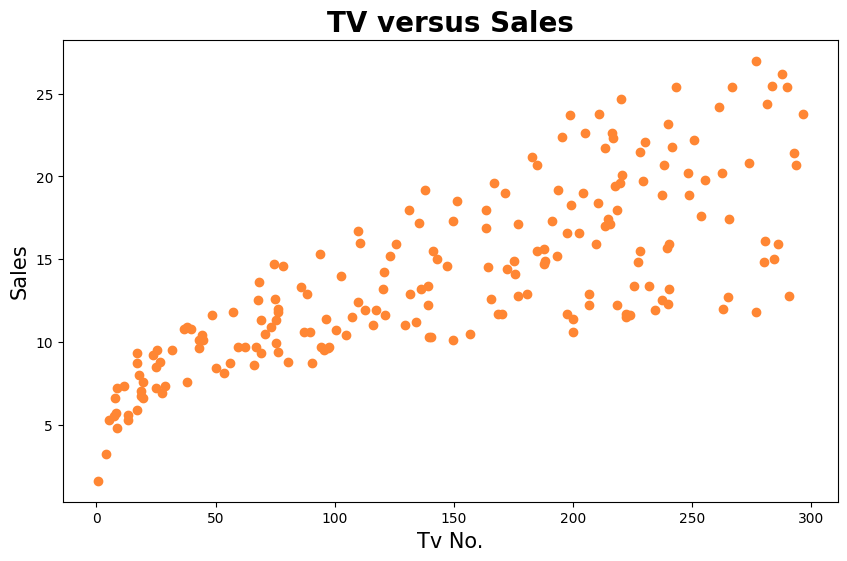

In [5]:
#scatterplot

plt.figure(figsize=(10,6))
plt.scatter(
            df['TV'],
            df['sales'],
            color ='#FF8633'
           )
plt.title('TV versus Sales',weight='bold',size='large',fontsize=20)
plt.xlabel('Tv No.',fontsize=15)
plt.ylabel('Sales',fontsize=15),
plt.show()

In [6]:
#correlation between Depenedent variable and independent variable
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [7]:
#splitting dependent and independent variable
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (140, 1)
X_test shape (60, 1)
y_train shape (140,)
y_test shape (60,)


In [8]:
#Instantiating and Fitting the Linear Regression Model
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [9]:
#Result of the model
# i) Intercept
# ii)Coefficient(Slope)

print('Intercept model:',model.intercept_)

Intercept model: 7.0325935491276965


In [10]:
print('Slope/Coefficient of the model:',model.coef_[0])

Slope/Coefficient of the model: 0.047536640433019736


# yht = Intercept + Slope/Coefficient  


# yht = 7.0325935491276965 + 0.047536640433019736 *  No. TV 

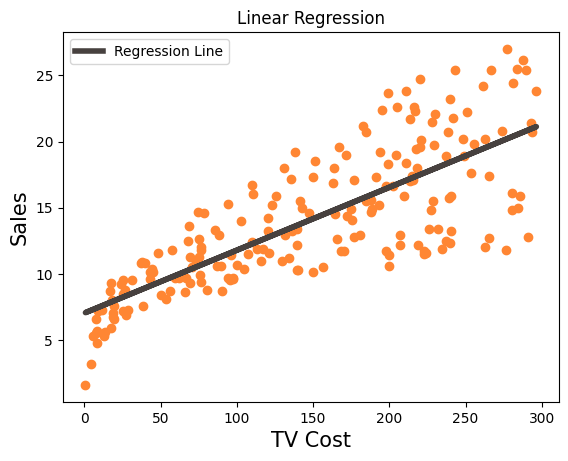

In [11]:
#Visualising the model

plt.scatter(x,y,color="#FF8633")
yhat = model.predict(x)
fig = plt.plot(x,yhat,lw=4,color="#47413F",label="Regression Line")
plt.xlabel("TV Cost",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title('Linear Regression')
plt.legend()
plt.show()

In [12]:
#Predicting the independent Variable
Preds= model.predict(x)
Preds[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [13]:
pre_act = pd.DataFrame(Preds,df['sales'])
pre_act.columns = ['Predictions']
pre_act=pre_act.reset_index()

# pre_act['Absolute-Diff'] = np.abs(pre_act['sales']-pre_act['Predictions'])
# # pre_act['Absolute-Diff'].plot(ylabel='Deviations',
#                               xlabel='TV',
#                               title="Absolute Difference vs No. Tv Advertising",
#                              figsize=(12,6),
#                              color='orange',
#                              ls='--')
# plt.show()

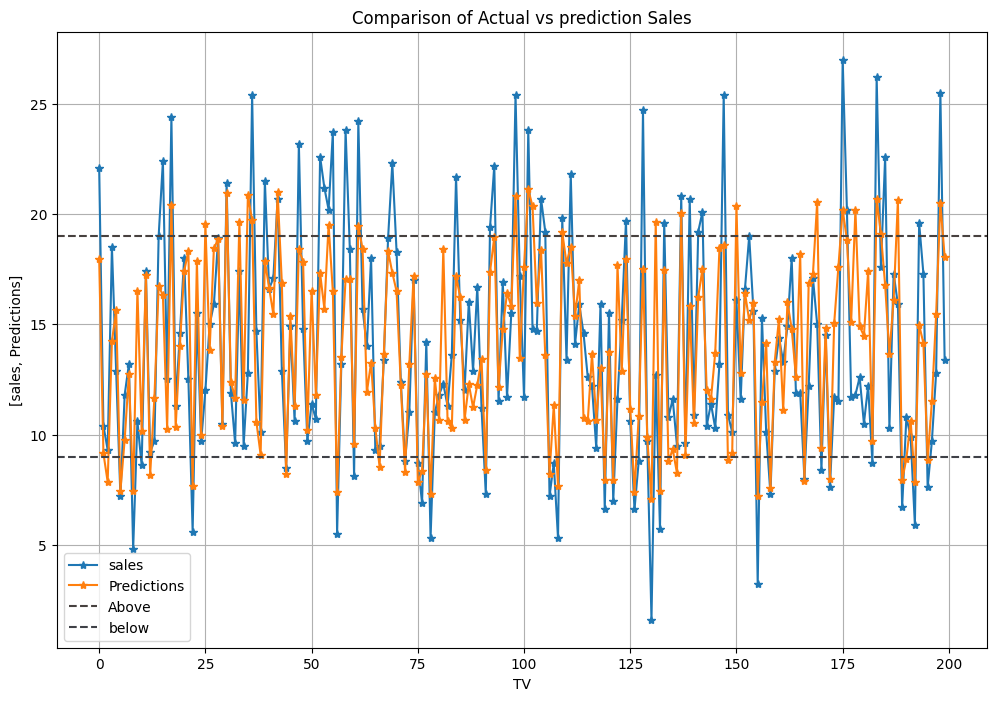

In [14]:
#Visualising Predictions vs Actual
pre_act.plot(marker="*",
             figsize=(12,8),
             xlabel="TV",ylabel=["sales",'Predictions'],
             title='Comparison of Actual vs prediction Sales',
             grid= "white"
            )
plt.axhline(y = 19, color = '#47413F', linestyle = '--',label='Above')
plt.axhline(y = 9, color =  '#3F4147', linestyle = '--',label='below')
plt.legend(loc='best')
plt.show()

In [15]:
#Evaluation of the Model
print("Mean Squared Error(MSE)",mean_squared_error(df['sales'],Preds))
print("Mean Abslute Error(MAE)",mean_absolute_error(df['sales'],Preds))
print("R Squared",r2_score(df['sales'],Preds))

Mean Squared Error(MSE) 10.512652915656757
Mean Abslute Error(MAE) 2.549806038927486
R Squared 0.611875050850071


# 2.Statsmodels

# Regression model with Statmodels

In [16]:
x1= sm.add_constant(x)
model1= sm.OLS(y,x1).fit()
rsquared =model1.rsquared
rsquared

0.611875050850071

In [17]:
#Intercept and slope of Regression
print('Intercept:',model1.params[0])
print('Coefficient:',model1.params[1])

Intercept: 7.032593549127693
Coefficient: 0.04753664043301975


In [18]:
#Summary of the model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        19:53:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pip install  PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [20]:
# pip install imageio


     ---------------------------------------- 0.0/313.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/313.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/313.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/313.2 kB ? eta -:--:--
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 kB/s eta 0:00:03
     --- --------------------------------- 30.7/313.2 kB 119.1 k